# Data Preparation 03

On Data Preparation step 03, I'm generating synthetic image data by rotating them from -90 to 90 degree. This results are 180 * 36 images equal to around 6400 images.

## Datascan iv
The main function js.rotate_image is defines in the JassSummarizer.py helper library.



In [1]:
import JassSummarizer as js
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
import os
import cv2                                                              # computer vision python library see README.md dependencies


In [2]:
iCnt=0
outputPath=r".\images\02_data_preparation\train_datascan_iv"                        # initialize path
if not os.path.exists(outputPath):                                                  # check availability of outputpath
    os.mkdir(outputPath)                                                            # create if necessary
if not os.path.exists(r".\images\02_data_preparation\train_datascan_iv\D8\D8_006479.jpg"):
    for cardType in "a,b,c,d".split(","):                                           # iterate for each card type
        path=r".\\images\\"+cardType                                                # construct desired input path
        fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.jpg']
        with tqdm(total=len(fileList)) as pbar:                                     # visualize progress
            for file in fileList:                                                   # iterate trough all files found 
                myImage=cv2.imread(file,cv2.IMREAD_COLOR)                           # read image
                frameOrg,mask,img_rect,res,original,d=js.analyzeScan(myImage,0.5)   # call analyzeScan
                cardType=file.split("\\")[-1][0:2].upper()                          # get target cardType
                outputPathCard=os.path.join(outputPath,cardType)                    # prepare outputpath
                if not os.path.exists(outputPathCard):                              # check if already there
                    os.mkdir(outputPathCard)                                        # create if not there
                for angle in range(-90,90,1):                                       # loop trough the angles
                    bigImage=np.zeros((1104*3,724*3,3),"uint8")                     # build superset image to make sure it gets fit during rotating
                    myImage=original.copy()                                         # copy original data
                    bigImage[1104:(1104+myImage.shape[0]), 724:(724+myImage.shape[1])] = myImage
                    result=js.rotate_image(bigImage,angle)                          # rotate image on angle
                    frameOrg,mask,img_rect,res,crop_img,d=js.analyzeScan(result,0.4)       # crop image
                    outFilename=os.path.join(outputPathCard,f"{cardType}_{iCnt:06d}.jpg")  # generate output filename
                    cv2.imwrite(outFilename, js.scaleImage(crop_img,40))            # scale & save scan to corresponding path (using tempory path for convenience)
                    iCnt=iCnt+1                                                     # increase counter
                pbar.update(1)                                                      # update progres bar

# Datascan v

On the 11.03.2021 the datascan_ii dataset has been enhanced with synthetic rotation for every 3° from -90° to 90°. This calculation and image generation has **taken about 4.5 hours**. Finaly the datascan_v has now about 69'360 images.

>Note: There is a if expression which prevents the next time consuming step. If you have to or want to generate the images, please correct the expression to; **if 1==1:**


In [3]:
# if you realy want to generate the images, edit the next line to : 1==1
if 1==2:
    iCnt=0
    pathList= [r".\images\02_data_preparation\datascan_ii"]
    OUTPUTPATH= r".\images\02_data_preparation\train_datascan_v"
    # iterate trough pathList
    for path in pathList:
        setName=OUTPUTPATH[-1]
        outputPath=OUTPUTPATH
        if not os.path.exists(outputPath):                                                  # check availability of outputpath
            os.mkdir(outputPath)                                                            # create if necessary

        # generate a fileList of desired mp4 files
        fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.jpg']

        with tqdm(total=len(fileList)) as pbar:                                     # visualize progress
                for file in fileList:                                                   # iterate trough all files found 
                    myImage=cv2.imread(file,cv2.IMREAD_COLOR)                           # read image
                    frameOrg,mask,img_rect,res,original,d=js.analyzeScan(myImage,0.5)   # call analyzeScan
                    cardType=file.split("\\")[-1][0:2].upper()                          # get target cardType
                    outputPathCard=os.path.join(outputPath,cardType)                    # prepare outputpath
                    if not os.path.exists(outputPathCard):                              # check if already there
                        os.mkdir(outputPathCard)                                        # create if not there
                    for angle in range(-90,90,3):                                       # loop trough the angles
                        bigImage=np.zeros((1104*3,724*3,3),"uint8")                     # build superset image to make sure it gets fit during rotating
                        myImage=original.copy()                                         # copy original data
                        bigImage[1104:(1104+myImage.shape[0]), 724:(724+myImage.shape[1])] = myImage
                        result=js.rotate_image(bigImage,angle)                          # rotate image on angle
                        frameOrg,mask,img_rect,res,crop_img,d=js.analyzeScan(result,0.4)       # crop image
                        outFilename=os.path.join(outputPathCard,f"{cardType}_{iCnt:06d}.jpg")  # generate output filename
                        cv2.imwrite(outFilename, js.scaleImage(crop_img,40))            # scale & save scan to corresponding path (using tempory path for convenience)
                        iCnt=iCnt+1                                                     # increase counter
                    pbar.update(1)     

# RGB Color Histogram by each type and name
I decided to use a logarithmic scale because of the high amount of white in the captured picture. It shows more clearly the differences in the lower area.

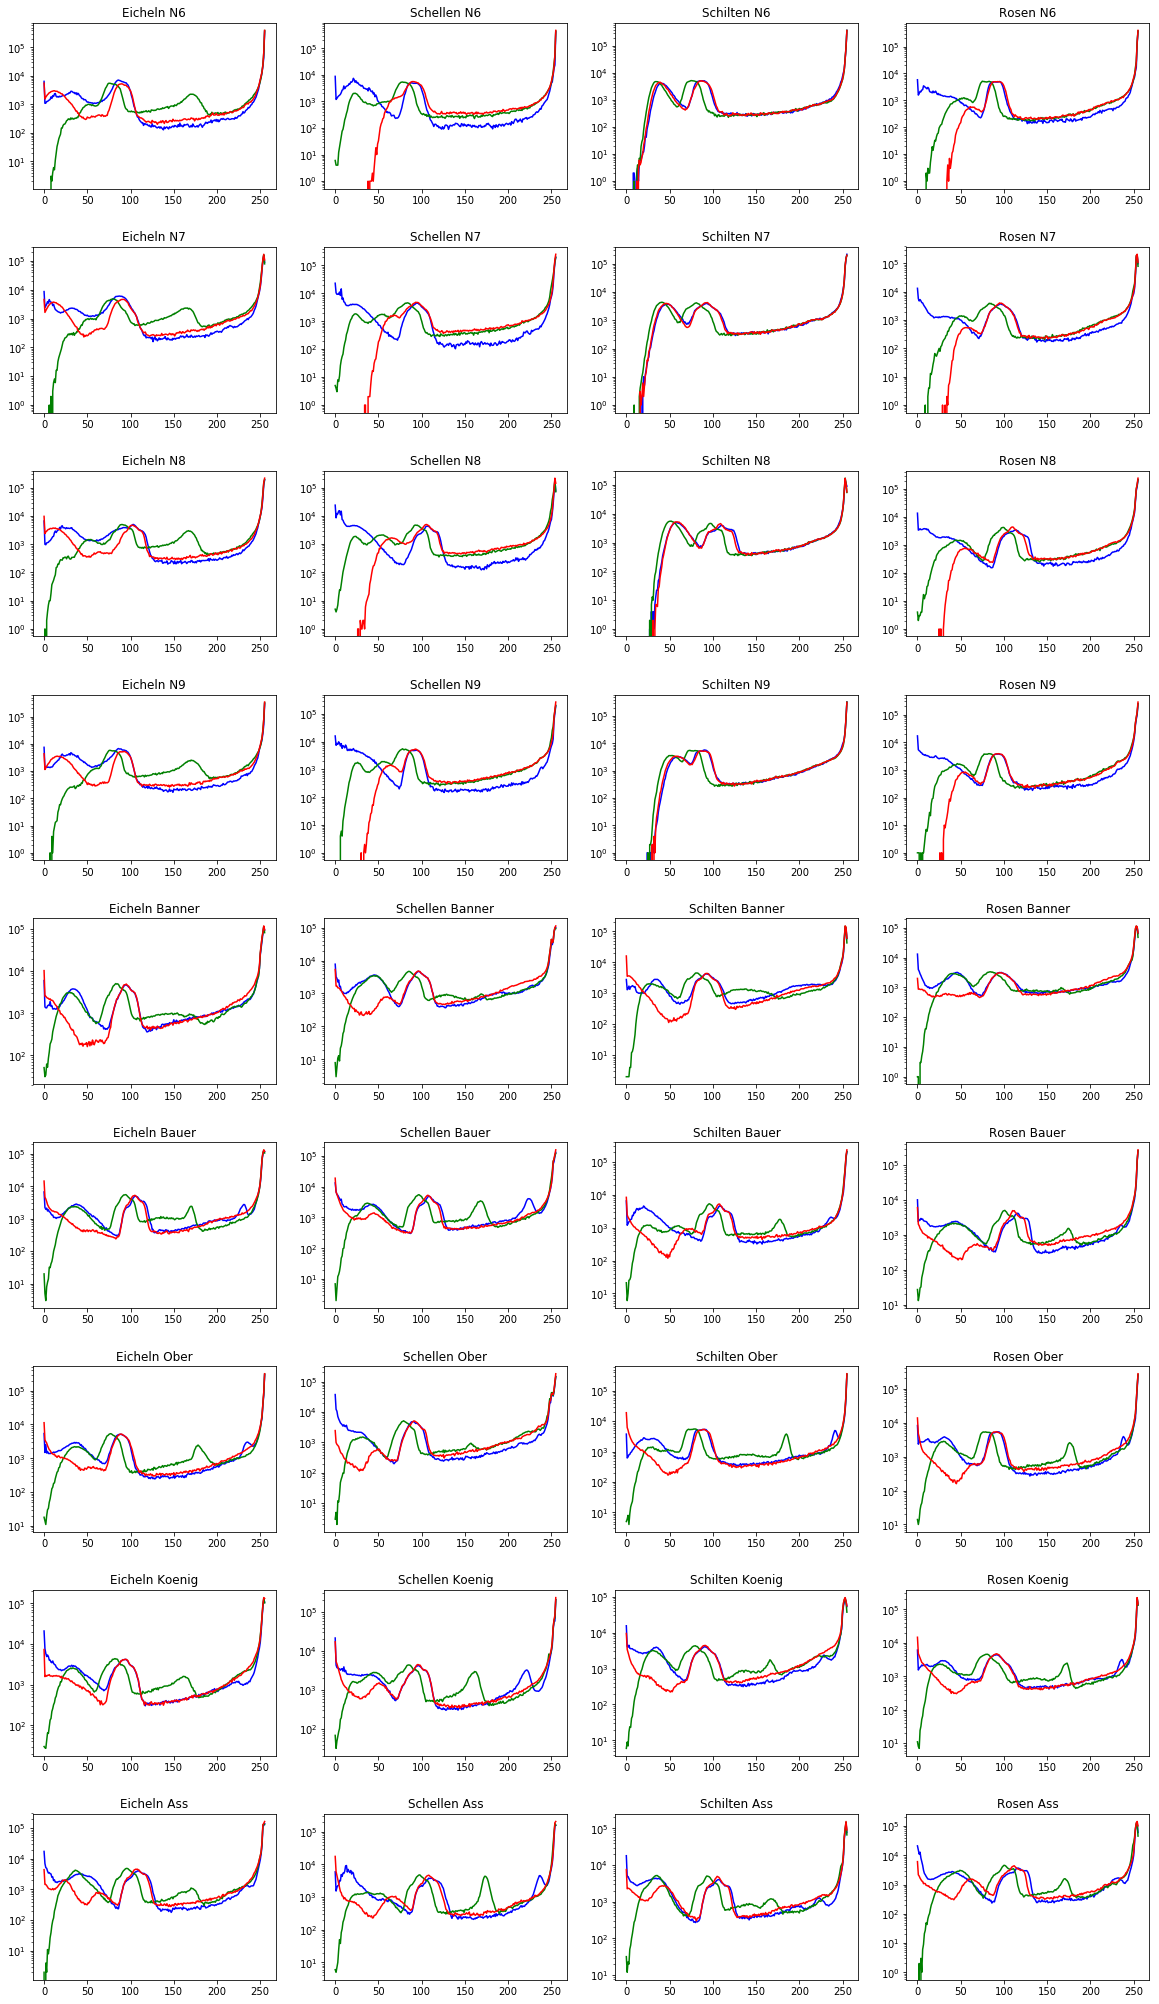

In [4]:
path = r".\images\a"
fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.jpg']

fig, axes = plt.subplots(nrows=9, ncols=4,figsize=[20, 36])                     # define matrix size
plt.subplots_adjust(hspace=0.35)                                                # make space between charts to read title

row=0                                                                           # row counter initialization
for cardNr in range(0,9):                                                       # row loop
    col=0                                                                       # col counter initialization
    for cardType in "a,b,c,d".split(","):                                       # loop trough cardTypes                 
        file = os.path.join(r".\images",cardType,f"{cardType}{cardNr}_{str(9-cardNr).zfill(4)}.jpg")        
        cardName=js.jassCardName(cardType.upper()+str(cardNr))                  # get cardName
        
        img = cv2.imread(file)                                                  # read image data
        #img = js.scaleImage(img,20)                                            # scaling if desired
        code=file.split("\\")[-1][0:2]                                          # code of card
        color = ('b','g','r')                                                   # the graph enumerator and color
        titel=js.jassCardName(code.upper())                                     # define titel for chart
        axes[row,col].set_title(titel)                                          # set titel in subchart      
        axes[row,col].set_yscale('log')                                         # set logarithmic scale (to many white pixels)       
        for i,col2 in enumerate(color):                                         # color enumerator
            histr = cv2.calcHist([img],[i],None,[256],[0,256])                  # calc histodata
            axes[row,col].plot(histr,color = col2)                              # plot histodata
        col=col+1                                                               # increment col
    row=row+1                                                                   # increment row
plt.show()